In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [55]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

L1 and L2 and Dropout regularization

In [68]:
initalizer = keras.regularizers.l1(0.01)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32, 3]),
    keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation = "softmax")
])

Data Augmentation

In [67]:
mnist = keras.datasets.cifar10

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
image_data = X_train_full[12]

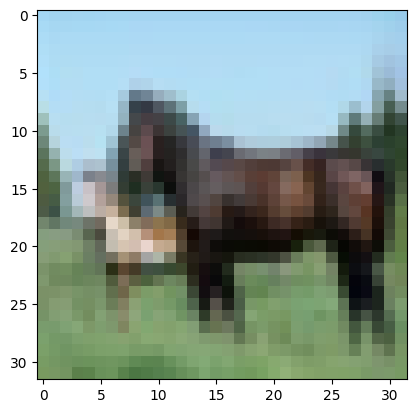

In [24]:
plt.imshow(image_data)
plt.show()

In [18]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

In [69]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [43]:
image=X_train_full[12]

In [44]:
image = tf.expand_dims(image_data, 0)

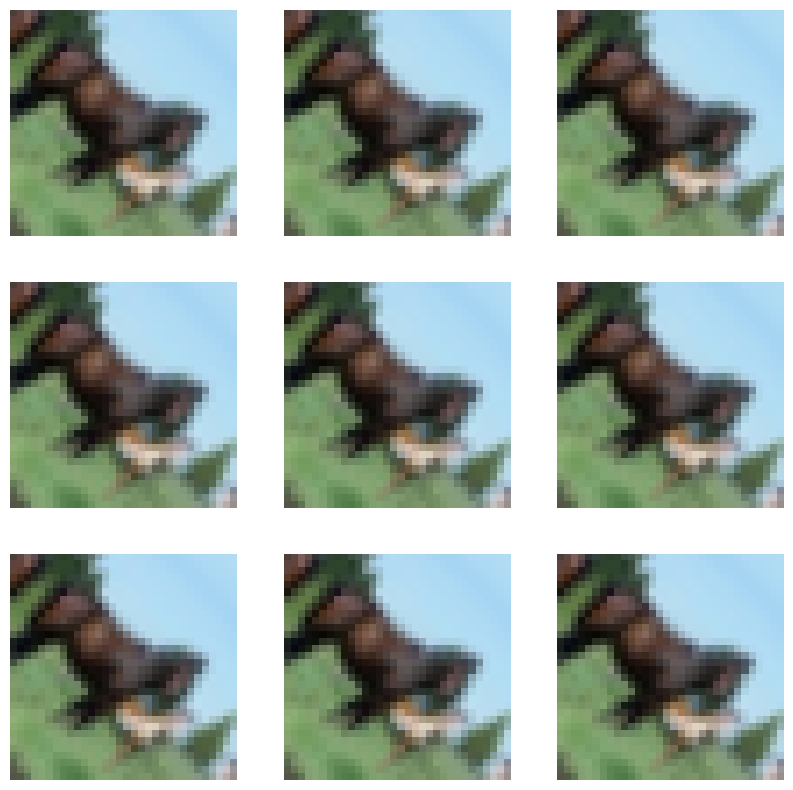

In [51]:
image = X_train_full[12]
image = tf.expand_dims(image, 0)  # Expands image dimensions to batch format

plt.figure(figsize=(10, 10))  # Set figure size

for i in range(9):
    augmented_image = data_augmentation(image)  # Apply data augmentation

    ax = plt.subplot(3, 3, i + 1)  # Create subplot
    plt.imshow(augmented_image_rescaled.numpy())  # Display rescaled image
    plt.axis("off")  # Turn off axis labels

plt.show()



In [70]:
model = keras.models.Sequential([
    data_augmentation,
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation = "softmax")
])

Early Stopping

In [71]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", min_delta=0.5, verbose=1, patience=5, restore_best_weights=True)

In [72]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [73]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32, callbacks=[early_stopping])

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.1410 - loss: 61.4794 - val_accuracy: 0.1038 - val_loss: 2.8571
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.1019 - loss: 2.7863 - val_accuracy: 0.0902 - val_loss: 2.7940
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.0961 - loss: 2.7789 - val_accuracy: 0.0970 - val_loss: 2.8007
Epoch 4/30
1356/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0995 - loss: 2.7755

KeyboardInterrupt: 

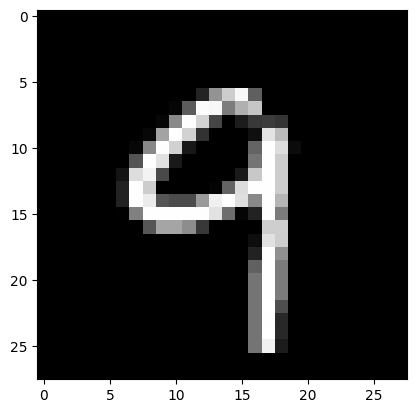

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
# batch = The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
# epochs = how many times to do a pass over all the dataset

# https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(X_train, y_train, epochs=3, validation_data = (X_valid, y_valid), batch_size=32) # also possible to use validation_split=0.1


Epoch 1/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7355 - loss: 1.0128 - val_accuracy: 0.9158 - val_loss: 0.3098
Epoch 2/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9117 - loss: 0.3062 - val_accuracy: 0.9302 - val_loss: 0.2432
Epoch 3/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9302 - loss: 0.2470 - val_accuracy: 0.9434 - val_loss: 0.2070


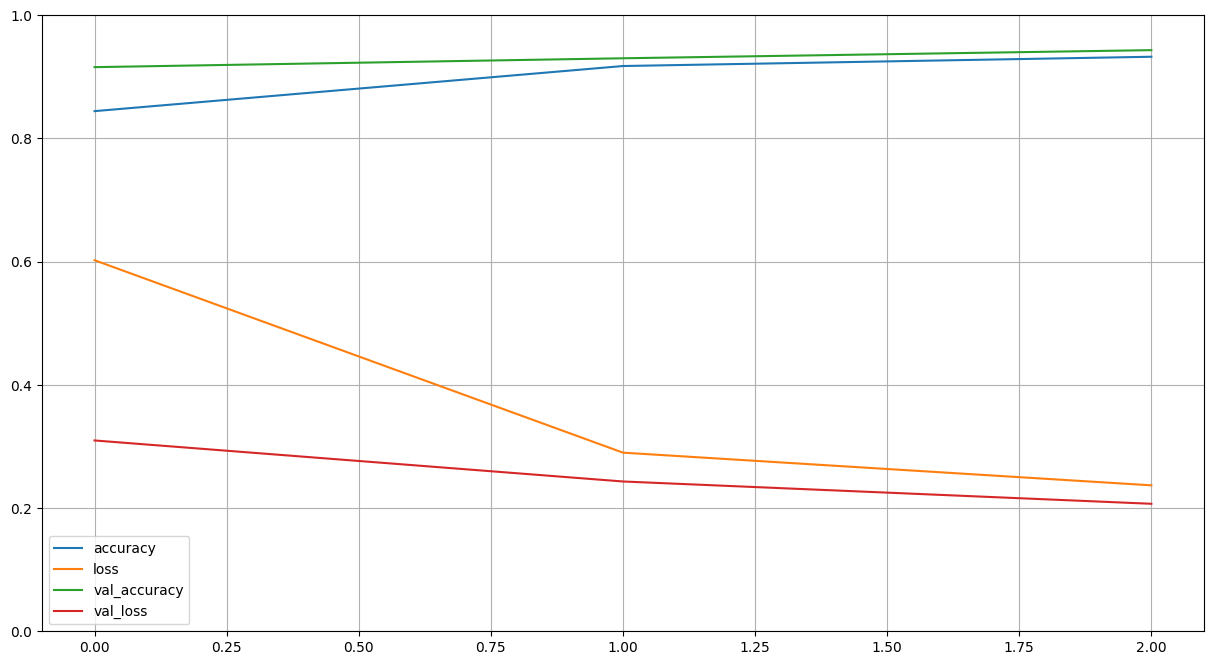

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9317 - loss: 0.2418


[0.21036945283412933, 0.9395999908447266]

In [ ]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.0193967e-04, 4.8421646e-07, 8.3234988e-04, ..., 9.9601531e-01,
        4.0612387e-05, 8.5686869e-04],
       [4.2137364e-03, 4.1978008e-05, 9.6970719e-01, ..., 2.2225196e-08,
        2.3933351e-03, 7.1438762e-08],
       [6.9755850e-05, 9.8545611e-01, 3.8363982e-03, ..., 1.3795145e-03,
        2.2266824e-03, 4.7450760e-04],
       ...,
       [3.7208775e-07, 1.4996874e-07, 1.1873126e-05, ..., 2.1775122e-04,
        8.8274787e-04, 9.0639526e-03],
       [3.6477856e-04, 2.3035510e-03, 9.2437491e-05, ..., 2.9245961e-05,
        7.6795943e-02, 1.1044712e-04],
       [2.7819065e-04, 9.2129078e-09, 3.8550491e-04, ..., 9.4393715e-10,
        1.6558440e-06, 4.5025100e-08]], dtype=float32)

In [ ]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

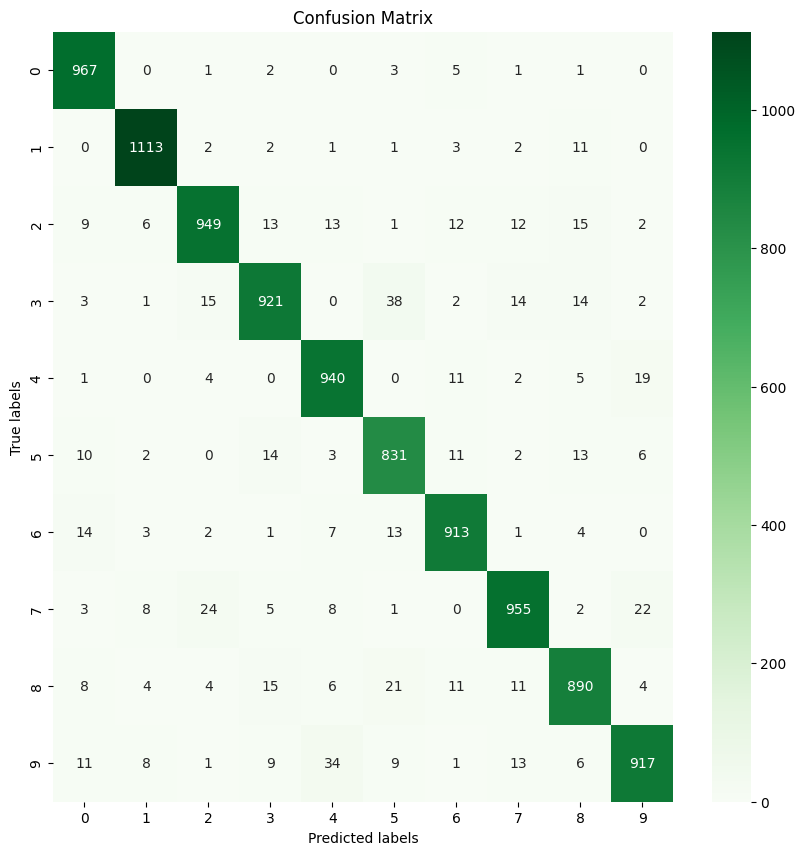

In [ ]:
import seaborn as sb

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()